In [1]:
cd ..

/Users/Amar/Dropbox/Computer_Science/GATECH-OMSCS/7641_ML/gatech-p3


In [2]:
%run __init__.py

In [3]:
ls data

_Dataset.pdf              adult_train_data.p        madelon_train.data.txt
adult.data.csv            adult_train_labels.p      madelon_train.labels.txt
adult.names.txt           madelon.param.txt         madelon_train_data.p
adult.test.csv            madelon_test.data.txt     madelon_train_labels.p
adult_test_data.p         madelon_test_data.p       madelon_valid.data.txt
adult_test_labels.p       madelon_test_labels.p     madelon_valid.labels.txt


## Loading the Adult Dataset

In [4]:
adult_feature_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                       'marital-status', 'occupation', 'relationship', 
                       'race', 'sex', 'capital-gain', 'capital-loss', 
                       'hours-per-week', 'native-country', 'target_class']

In [5]:
adult_df = pd.read_csv('data/adult.data.csv', header=None)
adult_df.columns = adult_feature_names
adult_data_df = adult_df.drop('target_class', axis=1)
adult_labels_srs = adult_df['target_class']

In [6]:
adult_df.memory_usage()

Index                 80
age               260488
workclass         260488
fnlwgt            260488
education         260488
education-num     260488
marital-status    260488
occupation        260488
relationship      260488
race              260488
sex               260488
capital-gain      260488
capital-loss      260488
hours-per-week    260488
native-country    260488
target_class      260488
dtype: int64

#### Encode Label Data

In [7]:
adult_labels_srs.unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
adult_labels_srs = pd.Series(LabelEncoder().fit_transform(adult_labels_srs))

In [9]:
adult_labels_srs.unique()

array([0, 1])

#### Display Distribution of Classes

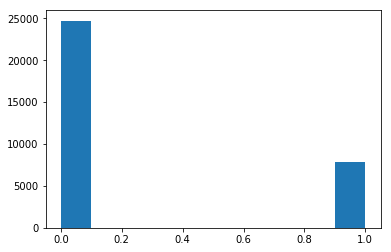

In [10]:
plt.hist(adult_labels_srs);

#### Set Aside Test Data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
adult_train_data, \
    adult_test_data, \
    adult_train_labels, \
    adult_test_labels = train_test_split(adult_data_df, adult_labels_srs, test_size=0.23, 
                                         random_state=42, stratify=adult_labels_srs)

In [13]:
adult_train_data = adult_train_data.copy()
adult_test_data = adult_test_data.copy()
adult_train_labels = adult_train_labels.copy()
adult_test_labels = adult_test_labels.copy()

#### Distribution of Target Class

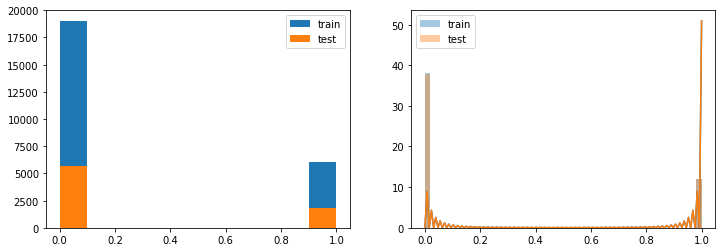

In [14]:
fig = plt.figure(figsize=(12,4))
fig.add_subplot(1,2,1)
plt.hist(adult_train_labels, label='train')
plt.hist(adult_test_labels, label='test')
plt.legend()
fig.add_subplot(1,2,2)
sns.distplot(adult_train_labels, label='train')
sns.distplot(adult_test_labels, label='test')
plt.legend()

#### Shape of Data

In [15]:
(adult_train_data.shape,
 adult_test_data.shape,
 adult_train_labels.shape,
 adult_test_labels.shape)

((25071, 14), (7490, 14), (25071,), (7490,))

#### Sample of Data

In [16]:
display(adult_train_data.sample(4))
display(adult_test_data.sample(4))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
18387,51,Local-gov,110327,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
2230,59,Self-emp-not-inc,174056,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,40,United-States
25454,54,Local-gov,196307,10th,6,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
3201,28,Private,142264,9th,5,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,50,Dominican-Republic


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
370,26,Federal-gov,185885,Some-college,10,Never-married,Adm-clerical,Unmarried,White,Female,0,0,15,United-States
4560,24,Private,403671,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States
2282,31,Private,219509,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Mexico
7101,37,Private,120045,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,56,United-States


## Loading the Madelon Dataset

#### Training Data

In [17]:
madelon_train_data = pd.read_csv('data/madelon_train.data.txt', header=None, sep=" ")
madelon_train_data.drop(500, axis=1, inplace=True)
madelon_train_labels = pd.read_csv('data/madelon_train.labels.txt', header=None)[0]

#### Test Data

In [18]:
madelon_test_data = pd.read_csv('data/madelon_valid.data.txt', header=None, sep=" ")
madelon_test_data.drop(500, axis=1, inplace=True)
madelon_test_labels = pd.read_csv('data/madelon_valid.labels.txt', header=None)[0]

#### Distribution of Target Class

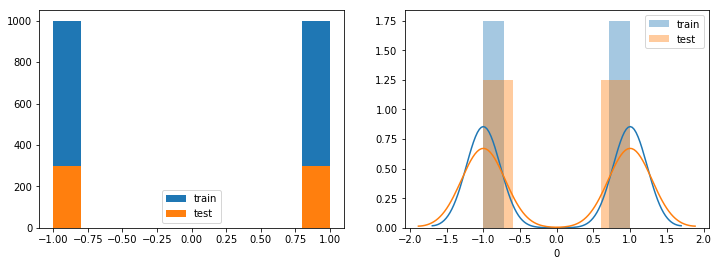

In [19]:
fig = plt.figure(figsize=(12,4))
fig.add_subplot(1,2,1)
plt.hist(madelon_train_labels, label='train')
plt.hist(madelon_test_labels, label='test')
plt.legend()
fig.add_subplot(1,2,2)
sns.distplot(madelon_train_labels, label='train')
sns.distplot(madelon_test_labels, label='test')
plt.legend()

#### Data Shape

In [20]:
(madelon_train_data.shape, 
 madelon_train_labels.shape,
 madelon_test_data.shape,
 madelon_test_labels.shape)

((2000, 500), (2000,), (600, 500), (600,))

#### Samples of Each Set

In [21]:
display(madelon_train_data.sample(4))
display(madelon_test_data.sample(4))

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1787,479,484,530,473,585,481,484,477,471,490,...,487,485,490,603,492,513,484,481,472,525
506,483,460,537,479,474,490,474,475,493,474,...,496,480,485,690,429,524,478,461,603,518
1118,476,484,466,485,472,482,478,475,477,484,...,466,477,462,393,459,524,475,483,492,445
1627,483,490,526,476,516,497,418,477,451,500,...,432,482,532,486,463,521,485,470,462,470


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
467,478,410,583,492,515,485,446,478,479,479,...,466,482,484,570,534,479,482,477,454,529
31,480,508,549,495,541,468,476,475,497,474,...,486,475,501,755,504,543,478,477,498,491
206,479,440,549,477,531,471,450,480,481,478,...,489,475,492,375,429,486,483,478,473,510
268,477,523,566,492,447,488,497,479,467,470,...,475,481,499,632,513,582,478,502,508,484


## Fill the nan values/missing values.

#### Training Data with NA values

In [22]:
for col in adult_train_data.columns:
    if adult_train_data[col].dtype == object:
        print(col, adult_train_data[col].str.contains(' \?').sum())

workclass 1411
education 0
marital-status 0
occupation 1417
relationship 0
race 0
sex 0
native-country 443


#### Testing Data with NA values

In [23]:
for col in adult_test_data.columns:
    if adult_test_data[col].dtype == object:
        print(col, adult_test_data[col].str.contains(' \?').sum())

workclass 425
education 0
marital-status 0
occupation 426
relationship 0
race 0
sex 0
native-country 140


#### Replace `' ?'` with `np.nan`

In [24]:
columns_with_na_vals = ['workclass', 'occupation', 'native-country']

In [25]:
for col in columns_with_na_vals:
    adult_train_data[col] = (adult_train_data[col]
                             .replace(to_replace=' ?', value=np.nan))
    adult_test_data[col] = (adult_test_data[col]
                            .replace(to_replace=' ?', value=np.nan))
    

#### Training Data with NA values

In [26]:
for col in adult_train_data.columns:
    if adult_train_data[col].dtype == object:
        print(col, adult_train_data[col].str.contains(' \?').sum())

workclass 0
education 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
native-country 0


#### Testing Data with NA values

In [27]:
for col in adult_test_data.columns:
    if adult_test_data[col].dtype == object:
        print(col, adult_test_data[col].str.contains(' \?').sum())

workclass 0
education 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
native-country 0


In [28]:
for col in adult_train_data.columns:
    if adult_train_data[col].dtype == object:
        print(col, sum(adult_train_data[col].isnull()))

workclass 1411
education 0
marital-status 0
occupation 1417
relationship 0
race 0
sex 0
native-country 443


In [29]:
for col in adult_test_data.columns:
    if adult_test_data[col].dtype == object:
        print(col, sum(adult_test_data[col].isnull()))

workclass 425
education 0
marital-status 0
occupation 426
relationship 0
race 0
sex 0
native-country 140


In [30]:
workclass_null_indices = set(adult_train_data[adult_train_data['workclass'].isnull()].index)
occupation_null_indices = set(adult_train_data[adult_train_data['occupation'].isnull()].index)
native_country_null_indices = set(adult_train_data[adult_train_data['native-country'].isnull()].index)

In [31]:
len(workclass_null_indices | occupation_null_indices | native_country_null_indices)/len(adult_train_data)

0.07339156794703043

In [32]:
workclass_null_indices = set(adult_test_data[adult_test_data['workclass'].isnull()].index)
occupation_null_indices = set(adult_test_data[adult_test_data['occupation'].isnull()].index)
native_country_null_indices = set(adult_test_data[adult_test_data['native-country'].isnull()].index)

In [33]:
len(workclass_null_indices | occupation_null_indices | native_country_null_indices)/len(adult_test_data)

0.0746328437917223

## Check the data types

In [34]:
actual_types = ['continuous','categorical','continuous','categorical','continuous','categorical','categorical','categorical','categorical','categorical','continuous','continuous','continuous','categorical']

In [35]:
actual_types = pd.Series(actual_types, index=adult_train_data.dtypes.index)

In [36]:
pd.DataFrame([adult_train_data.dtypes, adult_test_data.dtypes, actual_types], 
             index=['train_set','test_set', 'actual_types']).T

,train_set,test_set,actual_types
age,int64,int64,continuous
workclass,object,object,categorical
fnlwgt,int64,int64,continuous
education,object,object,categorical
education-num,int64,int64,continuous
marital-status,object,object,categorical
occupation,object,object,categorical
relationship,object,object,categorical
race,object,object,categorical
sex,object,object,categorical


In [37]:
for col in adult_train_data.columns:
    if adult_train_data[col].dtype == object:
        adult_train_data[col] = adult_train_data[col].astype('category')

In [38]:
for col in adult_test_data.columns:
    if adult_test_data[col].dtype == object:
        adult_test_data[col] = adult_test_data[col].astype('category')

In [39]:
pd.DataFrame([adult_train_data.dtypes, adult_test_data.dtypes, actual_types], 
             index=['train_set','test_set', 'actual_types']).T

,train_set,test_set,actual_types
age,int64,int64,continuous
workclass,category,category,categorical
fnlwgt,int64,int64,continuous
education,category,category,categorical
education-num,int64,int64,continuous
marital-status,category,category,categorical
occupation,category,category,categorical
relationship,category,category,categorical
race,category,category,categorical
sex,category,category,categorical


### Check Null Count and Data Type

In [40]:
madelon_types = pd.DataFrame([madelon_train_data.dtypes, madelon_test_data.dtypes],
                             index=['train_set', 'test_set']).T
(madelon_types['train_set'] != int).sum(), (madelon_types['test_set'] != int).sum()

(0, 0)

In [41]:
for col in madelon_train_data.columns:
    null_count = madelon_train_data[col].isnull().sum()
    if null_count > 0: print(col)
    null_count = madelon_test_data[col].isnull().sum()
    if null_count > 0: print(col)

## Pickle Data

In [42]:
adult_train_data.to_pickle('data/adult_train_data.p')
adult_test_data.to_pickle('data/adult_test_data.p')
adult_train_labels.to_pickle('data/adult_train_labels.p')
adult_test_labels.to_pickle('data/adult_test_labels.p')

In [43]:
madelon_train_data.to_pickle('data/madelon_train_data.p')
madelon_test_data.to_pickle('data/madelon_test_data.p')
madelon_train_labels.to_pickle('data/madelon_train_labels.p')
madelon_test_labels.to_pickle('data/madelon_test_labels.p')